In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [3]:
#Convert index to string values
df.index=df.index.astype('str')
df.index
df1 = df.T.describe()
df1
np.mean(df, axis=1)
np.std(df, axis=1)

#Get margin of error at 95% confidence level
df1.loc['ME95']= pd.Series(1.96*df1.loc['std']/np.sqrt(df1.loc['count']))
df1

Index(['1992', '1993', '1994', '1995'], dtype='object')

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


1992    33312.107476
1993    41861.859541
1994    39493.304941
1995    47743.550969
dtype: float64

1992    200603.415985
1993     98384.876053
1994    140350.695166
1995     69771.625748
dtype: float64

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044
ME95,6508.897970,3192.254314,4553.902287,2263.851744


<IPython.core.display.Javascript object>


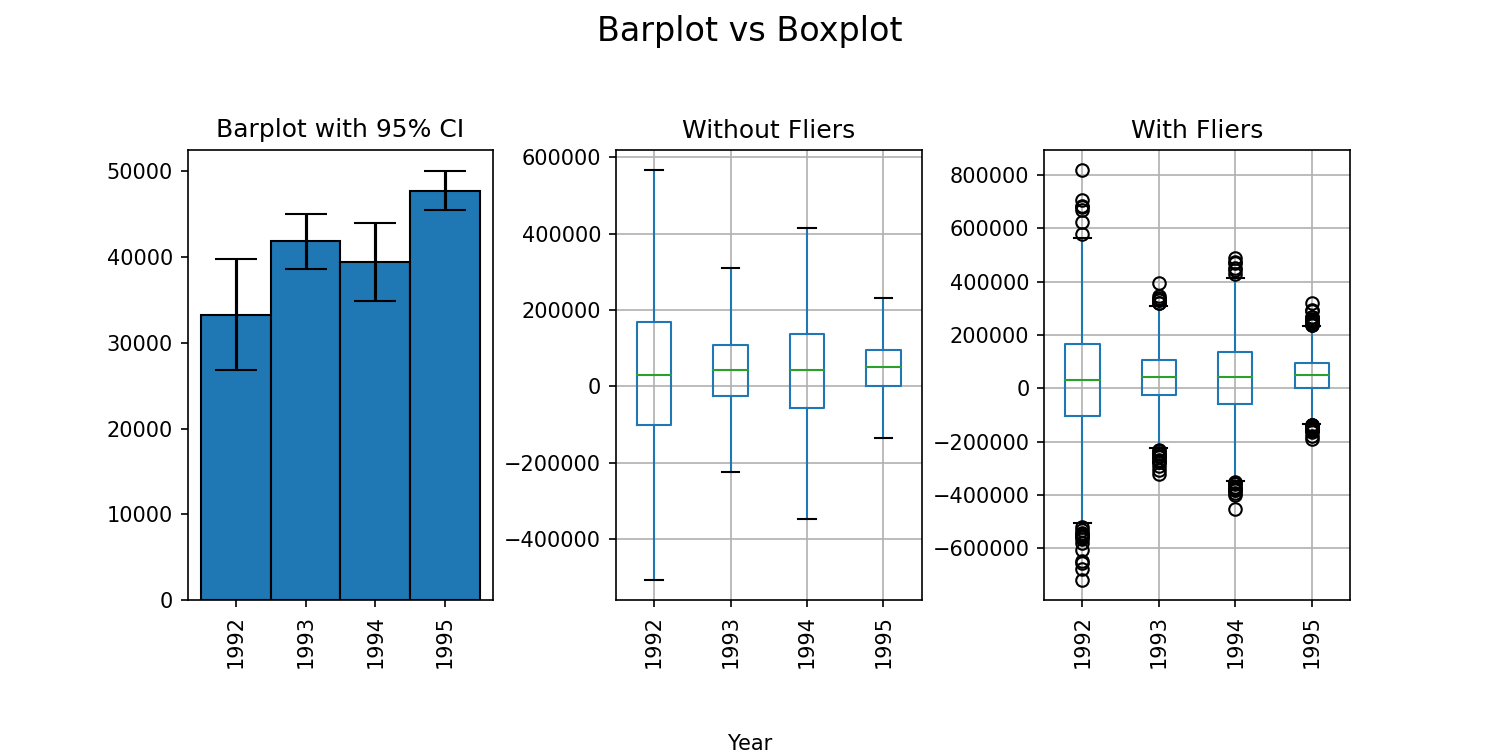

Text(0.5, 1.0, 'Barplot with 95% CI')

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Without Fliers')

Text(0.5, 1.0, 'With Fliers')

Text(0.5, 0, 'Year')

Text(0.5, 0.98, 'Barplot vs Boxplot')

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(10,5))

ax1.set_title('Barplot with 95% CI')
ax1.bar(x=list(df1.columns), height=df1.loc['mean'], width=1.0, yerr=df1.loc['ME95'], capsize=10
       ,edgecolor='black')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
ax2.set_title('Without Fliers')
df.T.boxplot(column = list(df.T.columns), ax=ax2, showfliers=False, rot=90)

ax3.set_title('With Fliers')
df.T.boxplot(column = list(df.T.columns), ax=ax3, rot=90)
fig.text(0.5, 0, 'Year', ha='center')
fig.suptitle('Barplot vs Boxplot', fontsize=16)
plt.subplots_adjust(top=0.8, bottom=0.2, wspace=0.4)

### Easy Option -- Discrete Coloring

(26803.209505574006, 39821.00544551466) (38669.60522738436, 45054.11385476242) (34939.40265431066, 44047.20722848714) (45479.699224956756, 50007.40271357751)


<IPython.core.display.Javascript object>


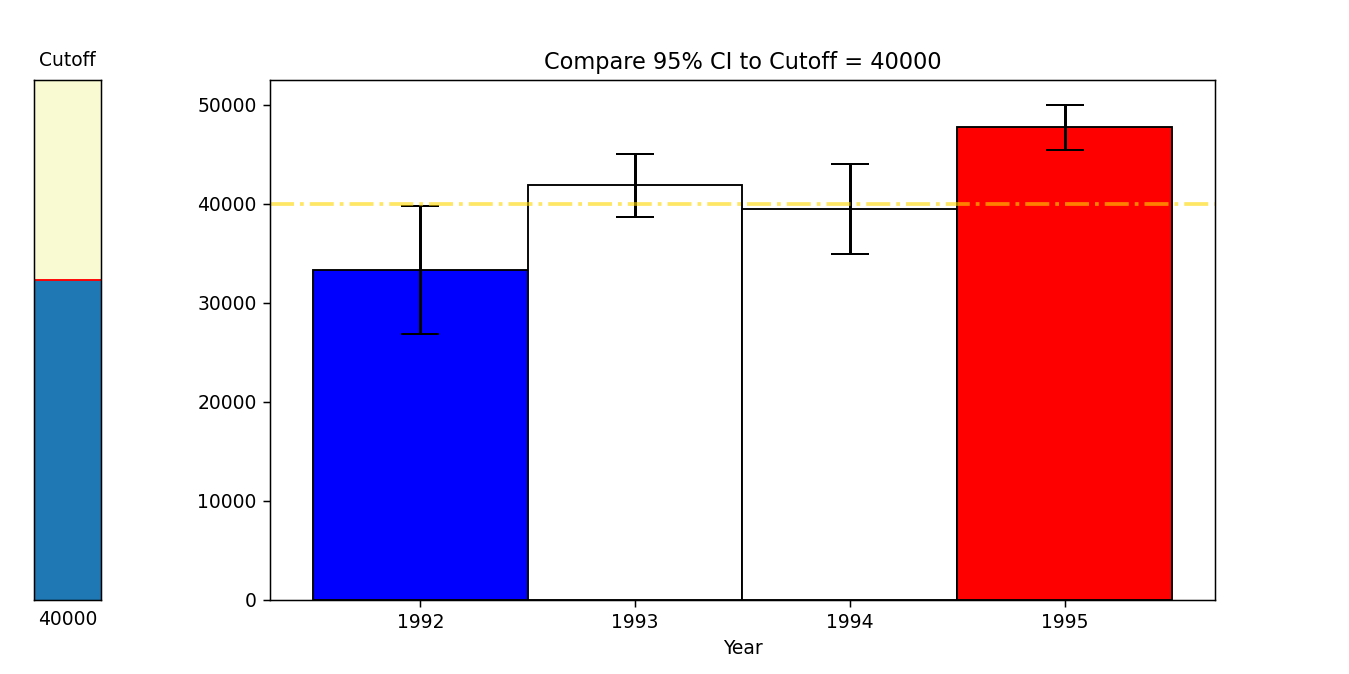

[26803.20950557 39821.00544551]
6508.897969970327
[38669.60522738 45054.11385476]
3192.254313689031
[34939.40265431 44047.20722849]
4553.90228708824
[45479.69922496 50007.40271358]
2263.8517443103774


Text(0.5, 1.0, 'Compare 95% CI to Cutoff = 40000')

Text(0.5, 0, 'Year')

0

In [267]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook

#Get lower and upper limits of 95% CI
ll = df1.loc['mean'] - df1.loc['ME95']
ul = df1.loc['mean'] + df1.loc['ME95']
print(*zip(ll, ul))

#Retrieve errorbar values and validate ll, ul
fig, ax = plt.subplots(1,1, figsize=(10,5))
b = ax.bar(x=list(df1.columns), height=df1.loc['mean'], width=1.0, yerr=df1.loc['ME95'], capsize=10)
b.errorbar.get_children()
lc = [i for i in b.errorbar.get_children() if i is not None][2]
# lc.get_segments()
for yerr in lc.get_segments():
    print (yerr[:,1]) # print start and end point
    print (yerr[1,1]- yerr[:,1].mean()) # print error

    
####   Start plotting  #####


#Create slider for cutoff
cutoff0 = 40000  #Initialize cutoff

#Bar coloring condition
bar_color = list(map(lambda x, y: 'red' if x>cutoff0 else('blue' if y<cutoff0 else 'white'), ll, ul))

#Create barplot
ax.set_title('Compare 95% CI to Cutoff = {:.0f}'.format(cutoff0))
ax.set_xlabel('Year')

b = ax.bar(x=list(df1.columns), height=df1.loc['mean'], width=1.0, yerr=df1.loc['ME95'], capsize=10
       ,color=bar_color, edgecolor='black')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

h = ax.axhline(y=cutoff0, c='gold', lw=2,ls='-.', alpha=0.6)
plt.subplots_adjust(left = 0.2)


#Get subplot position so that slider has the same vertical position
# [left, bottom], [wd, ht] = ax.get_position().get_points()
left, bottom, wd, ht= ax.get_position().bounds
# left, bottom, wd, ht
#Get y-axis limit to set slider upper limit
slider_max = round(ax.get_ylim()[1])

axcolor = 'lightgoldenrodyellow'

ax_cutoff = fig.add_axes([0.025, bottom, 0.05, ht], facecolor=axcolor)

s_cutoff = Slider(ax_cutoff, 'Cutoff', valmin=20000, valmax=slider_max, valinit=cutoff0, valstep=500, valfmt='%1.0f'
                  , orientation='vertical')


def update(val):
    cutoff = s_cutoff.val
    bar_color = list(map(lambda x, y: 'red' if x>cutoff else('blue' if y<cutoff else 'white'), ll, ul))
    for i, bar in enumerate(b):
        bar.set_fc(bar_color[i])
        
#     ax.bar(x=list(df1.columns), height=df1.loc['mean'], width=1.0, yerr=df1.loc['ME95'], capsize=10
#        ,color=bar_color, edgecolor='black')
    h.set_ydata(y=cutoff)
    ax.set_title('Compare 95% CI to Cutoff = {:.0f}'.format(cutoff))
    fig.canvas.draw_idle()

s_cutoff.on_changed(update)

### Even Harder Option -- Continuous Coloring

<IPython.core.display.Javascript object>


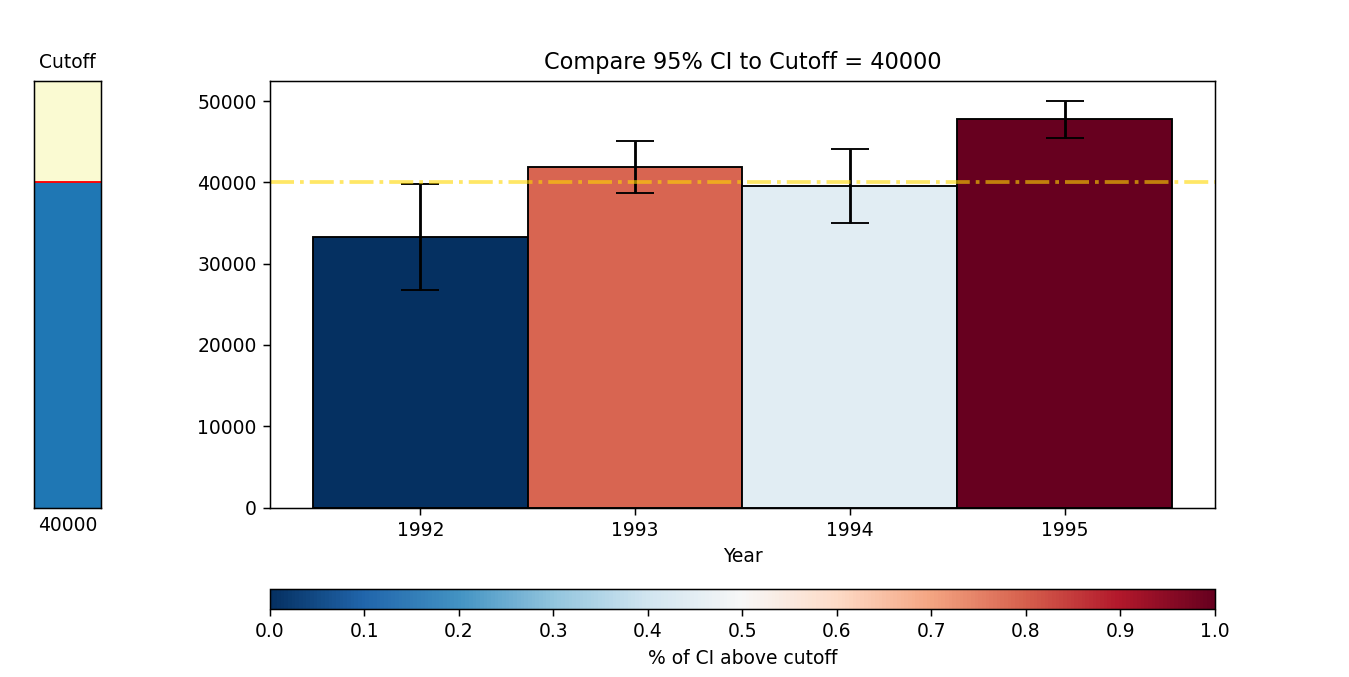

Text(0.5, 1.0, 'Compare 95% CI to Cutoff = 40000')

Text(0.5, 0, 'Year')

(0.2, 0.25, 0.7, 0.63)

0

In [265]:
import matplotlib.cm as cm
import matplotlib.colors as colors

fig, ax = plt.subplots(1,1, figsize=(10,5))

#Create slider for cutoff
cutoff0 = 40000  #Initialize cutoff

#Bar coloring condition = % of CI above the cutoff
# cutoff > upper limit: 0% above cutoff
# cutoff < lower limit: 100% above cutoff
# lower< cutoff <upper: x% above cutoff

bar_color = [0.0 if cutoff0>u else(1.0 if cutoff0<l else (u-cutoff0)/(u-l)) for (l,u) in zip(ll, ul)]

#Create barplot
ax.set_title('Compare 95% CI to Cutoff = {:.0f}'.format(cutoff0))
ax.set_xlabel('Year')

           
b=ax.bar(x=list(df1.columns), height=df1.loc['mean'], width=1.0, yerr=df1.loc['ME95'], capsize=10
       ,color=plt.cm.RdBu_r(bar_color), edgecolor='black')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

#Add horizontal cutoff line
h = ax.axhline(y=cutoff0, c='gold', lw=2,ls='-.', alpha=0.6)
fig.subplots_adjust(left = 0.2, bottom=0.25)


#Get subplot position so that slider and color bar align with the plot
# [left, bottom], [wd, ht] = ax.get_position().get_points()
left, bottom, wd, ht= ax.get_position().bounds
left, bottom, wd, ht


#Add color bar
my_cmap = plt.cm.get_cmap('RdBu_r')
ax_color = fig.add_axes([left, 0.1, wd, 0.03])
# a = np.reshape(np.linspace(0,1,11), (1,11))
a = np.linspace(0,1,11)
cNorm = colors.Normalize(vmin=0, vmax=1)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.RdBu_r) #same as using cmap = my_cmap

cbar = fig.colorbar(scalarMap, cmap=my_cmap, cax=ax_color,
                    ticks=np.linspace(0,1,11),
                    label='% of CI above cutoff',
                    orientation='horizontal'
                   )

#Get y-axis limit to set slider upper limit
slider_max = round(ax.get_ylim()[1])

axcolor = 'lightgoldenrodyellow'

ax_cutoff = fig.add_axes([0.025, bottom, 0.05, ht], facecolor=axcolor)

s_cutoff = Slider(ax_cutoff, 'Cutoff', valmin=0, valmax=slider_max, valinit=cutoff0, valstep=500, valfmt='%1.0f'
                  , orientation='vertical')


def update(val):
    cutoff = s_cutoff.val
    bar_color = [0.0 if cutoff>u else(1.0 if cutoff<l else (u-cutoff)/(u-l)) for (l,u) in zip(ll, ul)]
    for i, bar in enumerate(b):
        bar.set_fc(plt.cm.RdBu_r(bar_color[i]))
    
#     bar_color = [0 if cutoff0>u else(1 if cutoff0<l else (u-cutoff0)/(u-l)) for (l,u) in zip(ll, ul)]
    print(cutoff, bar_color)
#    ax.bar(x=list(df1.columns), height=df1.loc['mean'], width=1.0, yerr=df1.loc['ME95'], capsize=10
#        ,color=plt.cm.RdBu_r(bar_color), edgecolor='black')
    h.set_ydata(y=cutoff)
    ax.set_title('Compare 95% CI to Cutoff = {:.0f}'.format(cutoff))
    fig.canvas.draw_idle()

s_cutoff.on_changed(update)